# K Nearest Neighbour

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data/Titanic (1).csv')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [6]:
df['age'].fillna(df['age'].mean(), inplace=True)
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['sex', 'embarked', 'class', 'who'])
df['family_size'] = df['sibsp'] + df['parch'] + 1
columns_to_drop = ['sibsp', 'parch']
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df

,age,fare,alone,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,family_size
0,22.000000,7.2500,False,0,False,True,False,False,True,False,False,True,False,True,False,2
1,38.000000,71.2833,False,1,True,False,True,False,False,True,False,False,False,False,True,2
2,26.000000,7.9250,True,1,True,False,False,False,True,False,False,True,False,False,True,1
3,35.000000,53.1000,False,1,True,False,False,False,True,True,False,False,False,False,True,2
4,35.000000,8.0500,True,0,False,True,False,False,True,False,False,True,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,True,0,False,True,False,False,True,False,True,False,False,True,False,1
887,19.000000,30.0000,True,1,True,False,False,False,True,True,False,False,False,False,True,1
888,29.699118,23.4500,False,0,True,False,False,False,True,False,False,True,False,False,True,4
889,26.000000,30.0000,True,1,False,True,True,False,False,True,False,False,False,True,False,1


In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
X = df.drop(['survived'], axis = 1)

In [10]:
X

,age,fare,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,family_size
0,22.000000,7.2500,False,False,True,False,False,True,False,False,True,False,True,False,2
1,38.000000,71.2833,False,True,False,True,False,False,True,False,False,False,False,True,2
2,26.000000,7.9250,True,True,False,False,False,True,False,False,True,False,False,True,1
3,35.000000,53.1000,False,True,False,False,False,True,True,False,False,False,False,True,2
4,35.000000,8.0500,True,False,True,False,False,True,False,False,True,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,True,False,True,False,False,True,False,True,False,False,True,False,1
887,19.000000,30.0000,True,True,False,False,False,True,True,False,False,False,False,True,1
888,29.699118,23.4500,False,True,False,False,False,True,False,False,True,False,False,True,4
889,26.000000,30.0000,True,False,True,True,False,False,True,False,False,False,True,False,1


In [11]:
y = df['survived']

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [13]:
clf = KNeighborsClassifier(n_neighbors = 1)

In [17]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
clf.score(X_test,y_test),clf.score(X_train,y_train)

(0.7265917602996255, 0.9855305466237942)

In [19]:
train=[]
test=[]
diff=[]
for i in range(50):
  clf=KNeighborsClassifier(n_neighbors=i+1)
  clf.fit(X_train,y_train)
  train.append(clf.score(X_train,y_train))
  test.append(clf.score(X_test,y_test))
  diff.append(train[i]-test[i])

In [20]:
import matplotlib.pyplot as plt


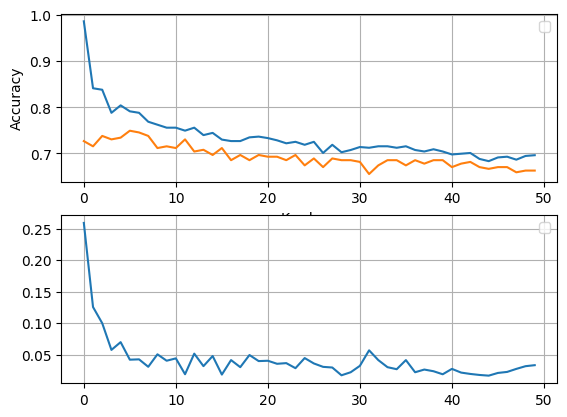

In [21]:
plt.subplot(2,1,1)
plt.ylabel("Accuracy")
plt.xlabel("K-values")
plt.legend()
plt.grid()
plt.plot(train,label='Train')
plt.plot(test,label="test")
plt.subplot(2,1,2)
plt.legend()
plt.grid()
plt.plot(diff,label='difference')
plt.show()

In [22]:
clf=KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.7877813504823151
0.7453183520599251


In [23]:
clf=KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.7556270096463023
0.7116104868913857


In [24]:
clf.predict([[22.000000,7.2500,False,False,True,False,False,True,False,False,True,False,True,False,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])